<a href="https://colab.research.google.com/github/pradeepkmaran/fake-news-detector-GloVe/blob/main/FakeNewsDetector_GloVe_LSTM_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science - Assignment 2**

**Team Members:**


1.   Oviasree S- 3122 22 5001 088
2.   Pradeep KM- 3122 22 5001 092
3.   Rithekha K- 3122 22 5001 106



# **Identifying the datasets**



*   True.csv
*   Fake.csv

Source: www.kaggle.com<br>
URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

&nbsp;&nbsp;&nbsp;&nbsp;The **True.csv** contains news that are verified to be true values and the **Fake.csv** contains news that have been circulated wrongly. Both these files contain four columns namely **title, text, subject and date**.

&nbsp;&nbsp;&nbsp;&nbsp;There are **20,000** records in the **True.csv** and **Fake.csv** files each adding to a total of 40,000 records together.

&nbsp;&nbsp;&nbsp;&nbsp;The news collected spans across all the months from years **2015** to **2017** and is mainly focussed on the American Geography.


# **Importing modules & Reading datasets**

In [ ]:
#Importing the necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from keras.utils import to_categorical

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
#Mounting drive and datasets to colab

from google.colab import drive
drive.mount('/content/drive')

trueDataSet = '/content/drive/MyDrive/FakeNews/True.csv'
fakeDataSet = '/content/drive/MyDrive/FakeNews/Fake.csv'


Mounted at /content/drive


In [ ]:
#Creating dataframes- true and false data

true = pd.read_csv(trueDataSet, encoding='utf-8')
fake = pd.read_csv(fakeDataSet, encoding='utf-8')

#Printing the first few records of the true and false news available

print('First 10 true news records: ')
print(true.head())
print()
print('First 10 false news records: ')
print(fake.head())
print()

First 10 true news records: 
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

First 10 false news records: 
                                      

# **Data Preparation**

In [ ]:
#Adding a category column to differentiate the credibility of the news records

true['category'] = 1
fake['category'] = 0

#Creating a joint dataframe
news = pd.concat([true, fake])
news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


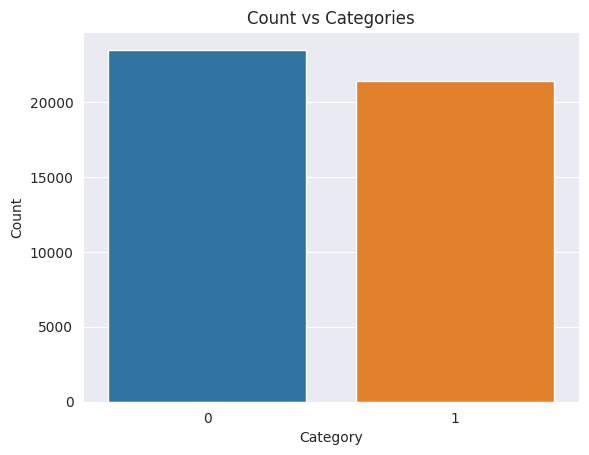

In [ ]:
#Analysing and Preprocessing the Data

#Plotting the data using seaborn module

sns.set_style('darkgrid')

sns.countplot(data=news, x='category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count vs Categories')
plt.show()



## **Checking for missing or null values**

In [ ]:
#Data Cleansing

#Checking for missing or NAN values
print('Missing value statistics:')
print(news.isna().sum())
print()
print('Null value statistics:')
print(news.isnull().sum())

Missing value statistics:
title       0
text        0
subject     0
date        0
category    0
dtype: int64

Null value statistics:
title       0
text        0
subject     0
date        0
category    0
dtype: int64


## **Exploratory Data Analysis**

In [ ]:
#Total data available
news.title.count()

#Types of news available
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

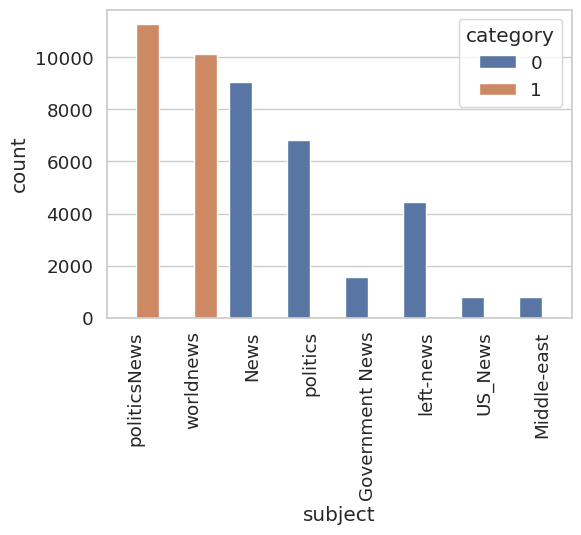

In [ ]:
#Plotting subject wise

plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

The above bar graphs shows the different subjects that in covered in real and fake news. In the true news, we have only 2 subjects( politicalnews and worldnews) whereas in in fake news, we have 6 subjects( News, Government News, left-news, US_News and Middle-east)

<ipython-input-19-eac7c8eb5eb3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['year'] = news['date'].dt.year


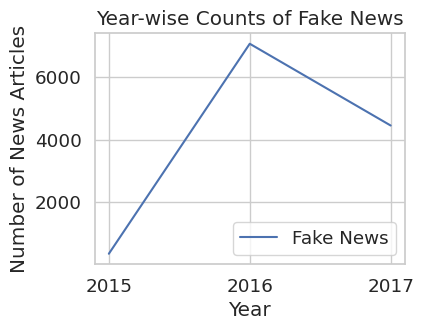

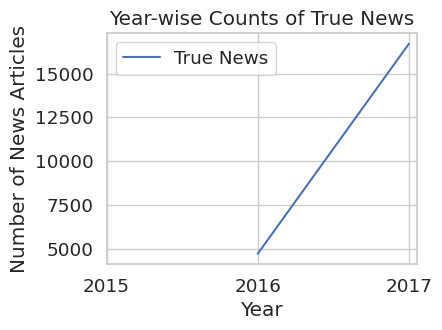

In [ ]:
# Combine the dataframes into a single dataframe
news = pd.concat([true, fake])

# Strip leading and trailing whitespace from the date column
news['date'] = news['date'].str.strip()

# Convert date column to datetime format
news['date'] = pd.to_datetime(news['date'], errors='coerce', format='%B %d, %Y')

# Remove rows with invalid dates
news = news.dropna(subset=['date'])

# Extract year column
news['year'] = news['date'].dt.year

# Group by year and category and calculate counts
year_wise_counts = news.groupby(['year', 'category']).size().unstack()

# Filter the data for the years 2015 to 2017
year_wise_counts = year_wise_counts.loc[2015:2017]

# Plot the year-wise counts of fake news
fake_counts = year_wise_counts[0]
plt.figure(figsize=(4, 3))  # Adjust the figure size as per your preference
plt.plot(fake_counts.index, fake_counts.values, label='Fake News')
plt.xlabel('Year')
plt.ylabel('Number of News Articles')
plt.title('Year-wise Counts of Fake News')
plt.legend()
plt.xticks(year_wise_counts.index)  # Set the x-axis ticks to the available years
plt.show()
print()
# Plot the year-wise counts of true news
true_counts = year_wise_counts[1]
plt.figure(figsize=(4, 3))  # Adjust the figure size as per your preference
plt.plot(true_counts.index, true_counts.values, label='True News')
plt.xlabel('Year')
plt.ylabel('Number of News Articles')
plt.title('Year-wise Counts of True News')
plt.legend()
plt.xticks(year_wise_counts.index)  # Set the x-axis ticks to the available years
plt.show()


The 1st graph above, shows the year-wise count of fake news. From this, we infer that fake news were minimal in the year 2015 and maximum in the year 2016.

The 2nd line graph shows the year-wise count of true news. From this, we infer that there was no fake news in the year 2015 and maximum in the year 2017.

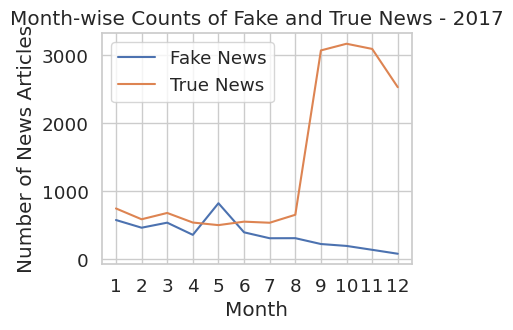

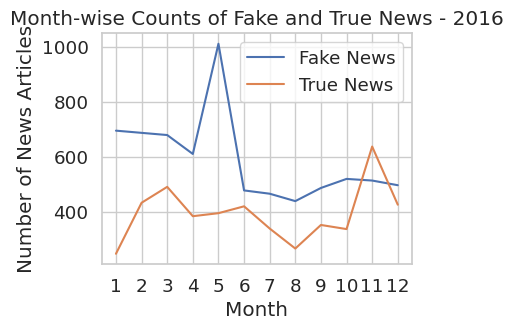

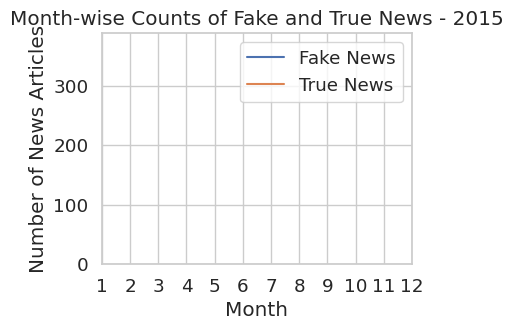

In [ ]:
#month-wise count of real and fake news in each year

# Combine the dataframes into a single dataframe
news = pd.concat([true, fake])

# Strip leading and trailing whitespace from the date column
news['date'] = news['date'].str.strip()

# Convert date column to datetime format
news['date'] = pd.to_datetime(news['date'], errors='coerce', format='%B %d, %Y')

# Remove rows with invalid dates
news = news.dropna(subset=['date'])

# Extract year and month columns
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month

# Group by year, month, and category and calculate counts
month_wise_counts = news.groupby(['year', 'month', 'category']).size().unstack()

# Filter the data for the years 2015 to 2017
month_wise_counts = month_wise_counts.loc[2015:2017]

# Get unique years
years = news['year'].unique()

# Create separate line graphs for each year
for year in years:
    plt.figure(figsize=(4, 3))  # Adjust the figure size as per your preference

    # Filter data for the specific year
    year_data = month_wise_counts.loc[year]

    # Plot the month-wise counts of fake news
    fake_counts = year_data[0]
    plt.plot(fake_counts.index, fake_counts.values, label='Fake News')

    # Plot the month-wise counts of true news
    true_counts = year_data[1]
    plt.plot(true_counts.index, true_counts.values, label='True News')

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Number of News Articles')
    plt.title(f'Month-wise Counts of Fake and True News - {year}')
    plt.legend()
    plt.xticks(range(1, 13))  # Set the x-axis ticks to cover all months

    # Adjust y-axis scale for 2015 to emphasize fake news
    if year == 2015:
        plt.ylim(0, max(fake_counts.max(), true_counts.max()) + 50)

    # Show the plot
    plt.show()

The 1st line graph shows the month-wise count of real and fake news in the year 2017. The no.of fake news in 2017 is less than the no.of true news. Also no.of true news peaked to a value of 3300(approx) in the month of october.

The 2nd line graph shows the month-wise count of real and fake news in the year 2016. The no.of real news in 2016 is less than the no.of true news. Also no.of fake news peaked to a value of 1000(approx) in the month of may and the no.of true news peaked in the month of november .

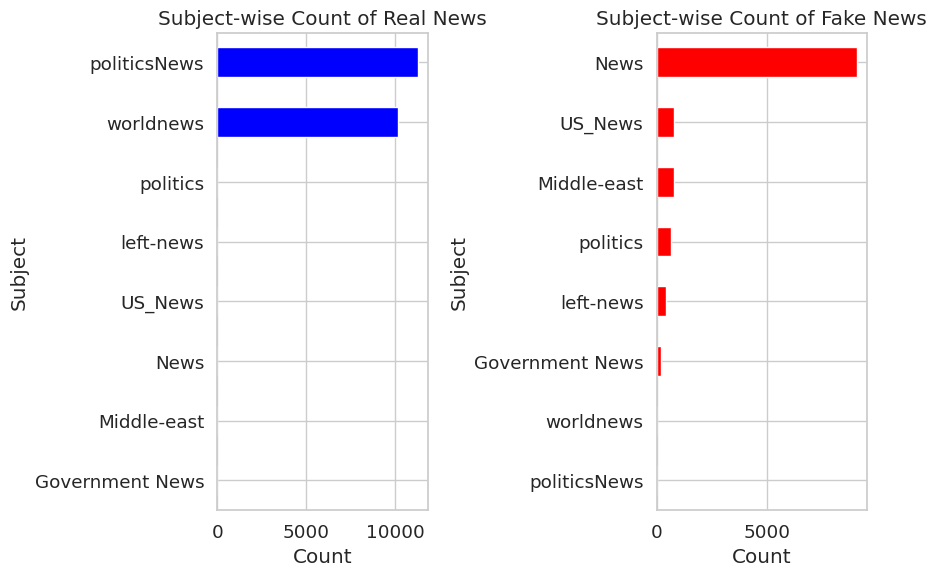

In [ ]:
# subject wise most fake and real news

# Group by subject and category, and calculate count
subject_count = news.groupby(['subject', 'category']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(9, 6))

# Real News
plt.subplot(1, 2, 1)
subject_count[1].sort_values().plot(kind='barh', color='blue')
plt.title('Subject-wise Count of Real News')
plt.xlabel('Count')
plt.ylabel('Subject')

# Fake News
plt.subplot(1, 2, 2)
subject_count[0].sort_values().plot(kind='barh', color='red')
plt.title('Subject-wise Count of Fake News')
plt.xlabel('Count')
plt.ylabel('Subject')

plt.tight_layout()
plt.show()

This bar graph shows the different subjects that in covered in real and fake news. In the true news, we have only 2 subjects( politicalnews and worldnews) whereas in in fake news, we have 6 subjects( News, Government News, left-news, US_News and Middle-east)

## **Data Integration**

In [ ]:
#Adding text and title columns

news['text'] = news['text'] + " " + news['title']
del news['title']
del news['subject']
del news['date']
del news['month']
del news['year']

news.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


## **Data Transformation**

**The data for the model can be transformed in 2 different ways.**


1.   GloVe embeddings.
2.   One-hot embeddings.

* The LSTM Model below is given with data transformed using GloVe embeddings.

* In the later part of the document, another LSTM Model is given with data transformed using One-hot embeddings

**More about the problem, and Embedding:**

Our problem is a classification problem, where we need to classify the input into two types- true or false. Also it’ll be requiring a supervised machine learning approach since we have the labels- 0 or 1 to be predicted.


We’ll first be working on the text data available. We’ll be removing extra spaces, splitting the text into words and removing repetitive/ unnecessary words [stop words]. We’ll be processing all the useful words available in the entire dataset using the OneHot Representation or GloVe Representation and assign each word an unique id from the vocabulary. These ids are then embedded into vectors which aid in training the model.




In [ ]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
print(stop)

{'his', 'or', "didn't", "'", 'you', 'won', ';', '{', 'with', 'how', 'there', '-', '>', 'through', 'can', "you'd", 'below', '|', '+', '%', 'nor', 'are', 'again', 'when', 'was', 'at', "that'll", 'itself', 'very', 'have', 'himself', 'that', 'myself', '!', ')', "you're", 'against', "don't", 'been', 'about', 'this', 'if', 'ain', '^', 'during', 're', 'these', 'yourselves', 'above', '\\', 'ourselves', 'your', 'no', 'until', 've', 'isn', 'to', "she's", 'just', '[', 'll', 'in', "couldn't", 'having', 'a', 'of', "doesn't", 'we', '~', 'them', 'd', 'down', 'over', 'off', 'wouldn', '"', "hadn't", "weren't", 'do', 'now', "won't", 'up', 'is', 'be', 'the', 'such', 'theirs', 'because', 'ours', 'both', 'after', 'needn', 'she', 'it', 'all', 'each', 'shan', '(', 'some', 'same', 'him', 'mustn', 'those', 'mightn', 'they', 'hadn', "needn't", 'what', "aren't", 'but', 'into', "wasn't", 'me', 'why', 'as', 'y', 'wasn', '`', 'doesn', '<', 'then', 'few', 'more', "shouldn't", '?', 'not', "you'll", 'and', 'yourself',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
news['text']=news['text'].apply(denoise_text)
news['text'].head()

<ipython-input-25-6b5fa97bc6a7>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


0    WASHINGTON (Reuters) head conservative Republi...
1    WASHINGTON (Reuters) Transgender people allowe...
2    WASHINGTON (Reuters) special counsel investiga...
3    WASHINGTON (Reuters) Trump campaign adviser Ge...
4    SEATTLE/WASHINGTON (Reuters) President Donald ...
Name: text, dtype: object

## **More Data Exploration**

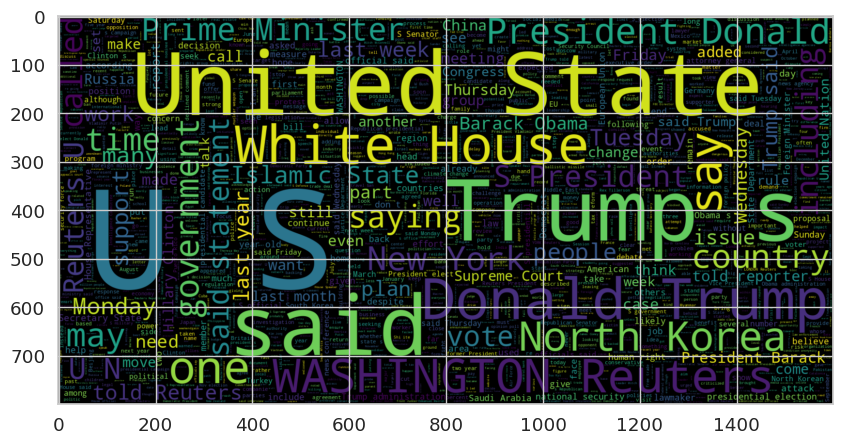

In [ ]:
plt.figure(figsize = (10,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

This is a word cloud representing the count of words in true news. From this, we can infer that US, said and Trump are the top 3 used words in true news.

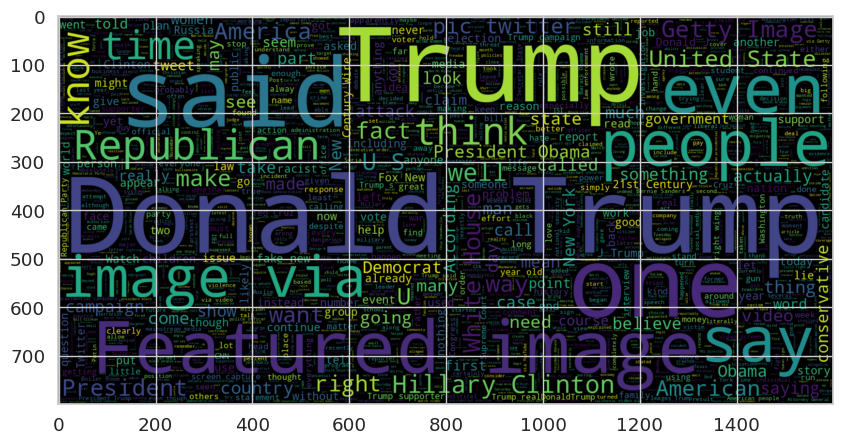

In [ ]:
plt.figure(figsize = (10,10)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news[news.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')


This is a word cloud representing the count of words in fake news. From this, we can infer that said, Donald Trump and one are the top 3 used words in fake news.


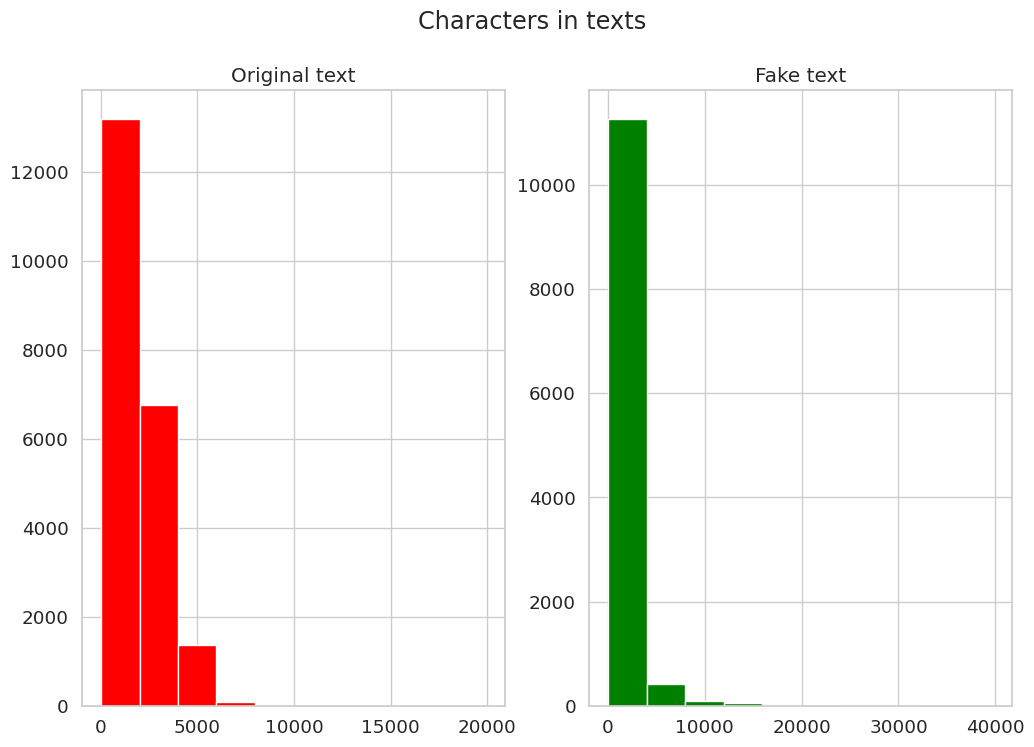

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=news[news['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=news[news['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

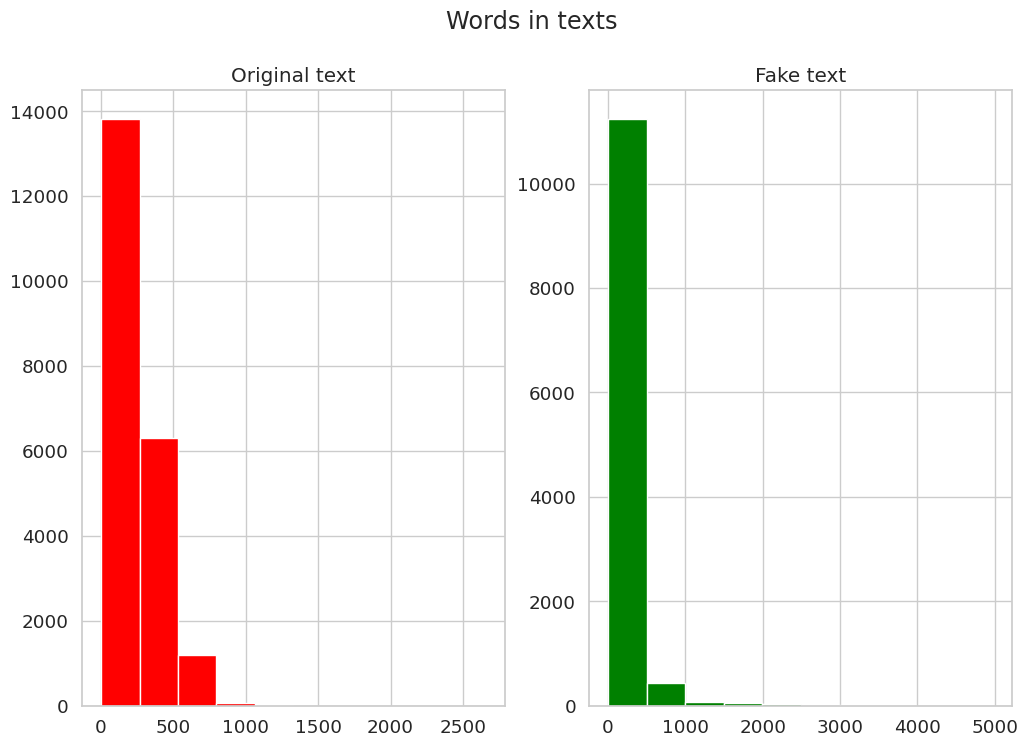

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=news[news['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=news[news['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

<ipython-input-30-ad5175fd550a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-30-ad5175fd550a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Average word length in each text')

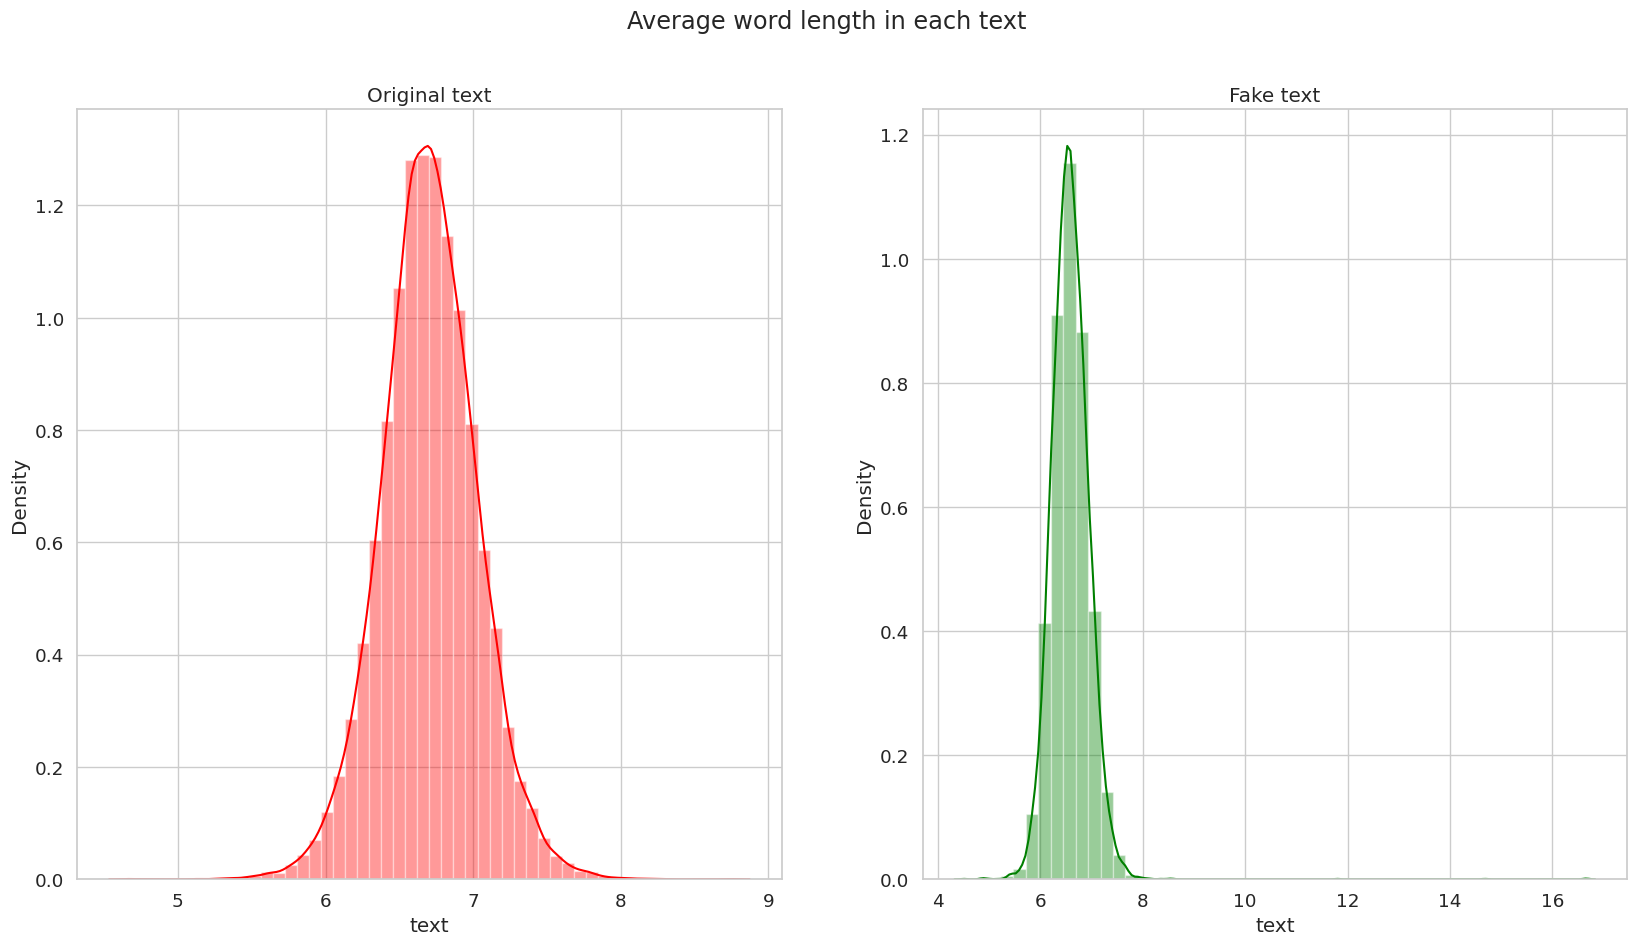

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=news[news['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=news[news['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(news.text)
corpus[:9]

['WASHINGTON',
 '(Reuters)',
 'head',
 'conservative',
 'Republican',
 'faction',
 'U.S.',
 'Congress,',
 'voted']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'Trump': 93864,
 'said': 81713,
 'U.S.': 45705,
 'would': 45450,
 'President': 25282,
 'people': 24875,
 'also': 24375,
 'said.': 23503,
 'Donald': 23462,
 'one': 21823,
 'Republican': 21319,
 '(Reuters)': 21240,
 'could': 19657,
 'House': 19482,
 'United': 19342,
 'government': 18767,
 'told': 18418,
 'last': 15327,
 'like': 14680,
 'two': 14343}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

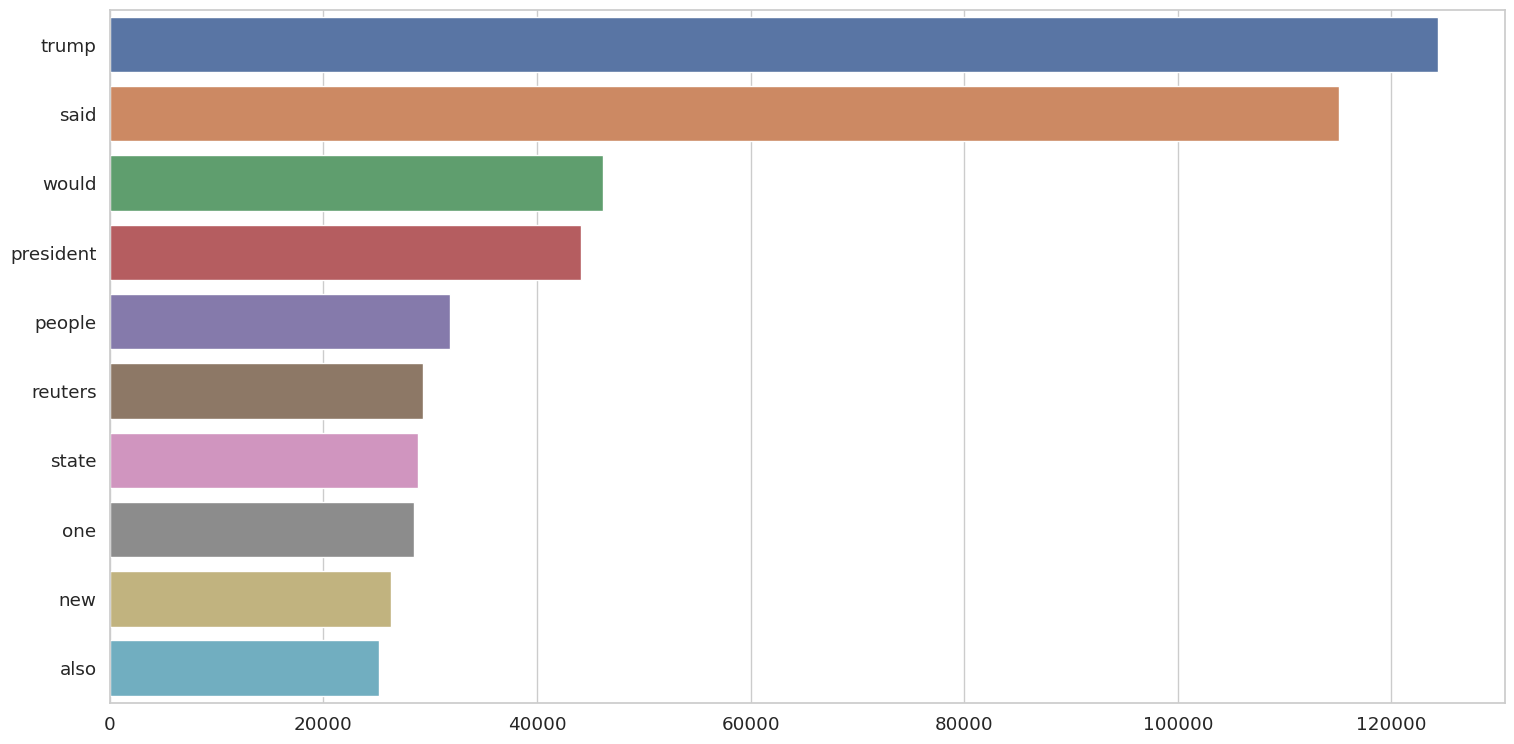

In [ ]:
plt.figure(figsize = (18,9))
most_common_uni = get_top_text_ngrams(news.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Axes: >

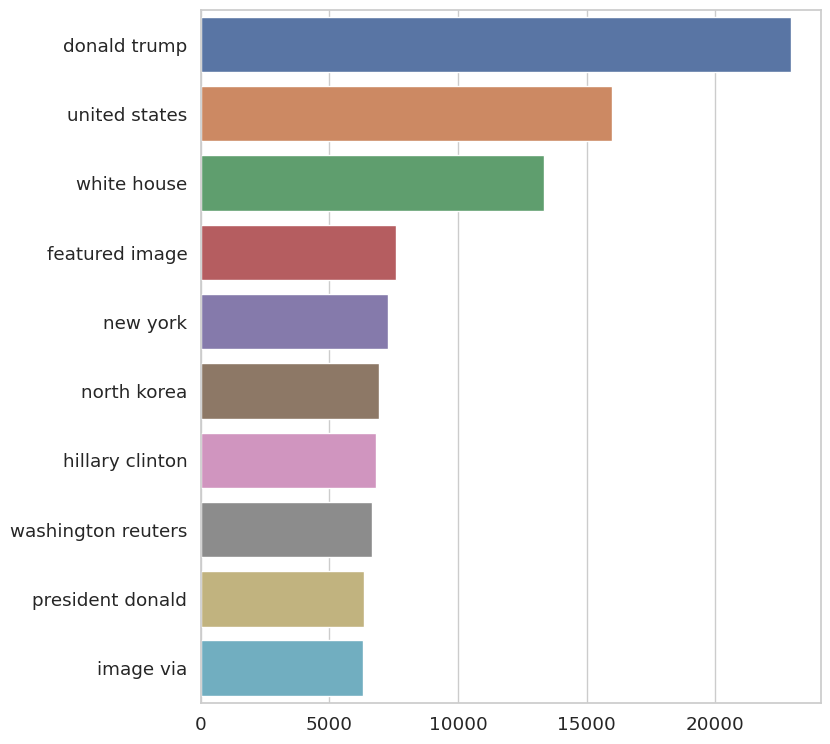

In [ ]:
plt.figure(figsize = (8,9))
most_common_bi = get_top_text_ngrams(news.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

<Axes: >

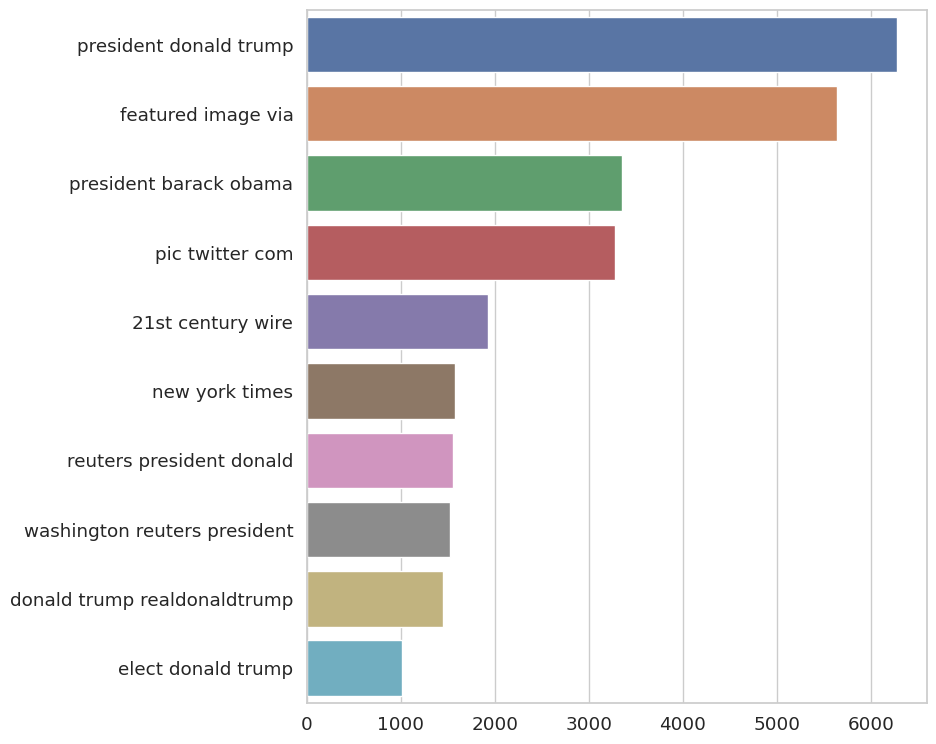

In [ ]:
plt.figure(figsize = (8,9))
most_common_tri = get_top_text_ngrams(news.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(news.text,news.category,random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/FakeNews/glove.twitter.27B.100d.txt'

In [ ]:
#feature extraction
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


# **Various possible approaches**

We have the embedded vectors of all the words prepared, and have the training data ready which will constitute about 70 percent of total data. We can fit these into a number of different supervised, classification machine learning approaches such as,
* LSTM - Long Short-Term Memory
* logistic regression
* decision tree
* random forest
* deep learning



**Our Machine Learning Approach:**

We have used 2 different Machine Learning Algorithms to classify a given news into Fake news or Real news.
<br>


1.   LSTM - Long Short Term Memory
  *   LSTM is a type of neural network that's great at understanding and predicting sequences of data, like sentences or time-based patterns. It's especially useful in tasks like language processing, speech recognition, and analyzing time series data. Unlike other networks, LSTMs have a memory that can remember important information over long sequences, making them good at capturing complex relationships and handling inputs of different lengths.
  *   **Why choose LSTM?**
      * Can handle variable-length input sequences.
      * Well-suited for sequential data and tasks with temporal dependencies.
      * Well-suited for sequential data and tasks with temporal dependencies.
      * Effective for tasks like sentiment analysis, machine translation, speech recognition, and time series prediction.



2.   Logistic Regression
  * Logistic Regression is a linear classification algorithm used for binary classification problems. It is a simple yet effective algorithm that models the relationship between the independent variables (features) and the binary outcome (target variable).
  * **Why choose Logistic Regression?**
      * Works well for binary classification tasks.
      * Assumes a linear relationship between features and the log-odds of the outcome.
      * Can handle both continuous and categorical input features.


# **Data Modelling - LSTM Model**

In the following snippets, an instance of LSTM Model is created, trained and tested with data transformed using GloVe embeddings.

In [ ]:
batch_size = 256
epochs = 5
embed_size = 100

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embedding layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/5
98/98 [==============================] - 626s 6s/step - loss: 0.1311 - accuracy: 0.9472 - val_loss: 0.0358 - val_accuracy: 0.9897 - lr: 0.0100
Epoch 2/5
98/98 [==============================] - 623s 6s/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.0205 - val_accuracy: 0.9927 - lr: 0.0100
Epoch 3/5
98/98 [==============================] - 628s 6s/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0131 - val_accuracy: 0.9953 - lr: 0.0100
Epoch 4/5
98/98 [==============================] - 606s 6s/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0264 - val_accuracy: 0.9938 - lr: 0.0100
Epoch 5/5
98/98 [==============================] - 583s 6s/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0081 - val_accuracy: 0.9974 - lr: 0.0100


## **Accuracy and Evaluation Metrics**

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

781/781 [==============================] - 159s 203ms/step - loss: 0.0018 - accuracy: 0.9996
Accuracy of the model on Training Data is -  99.96394515037537 %
261/261 [==============================] - 50s 193ms/step - loss: 0.0081 - accuracy: 0.9974
Accuracy of the model on Testing Data is -  99.73564147949219 %


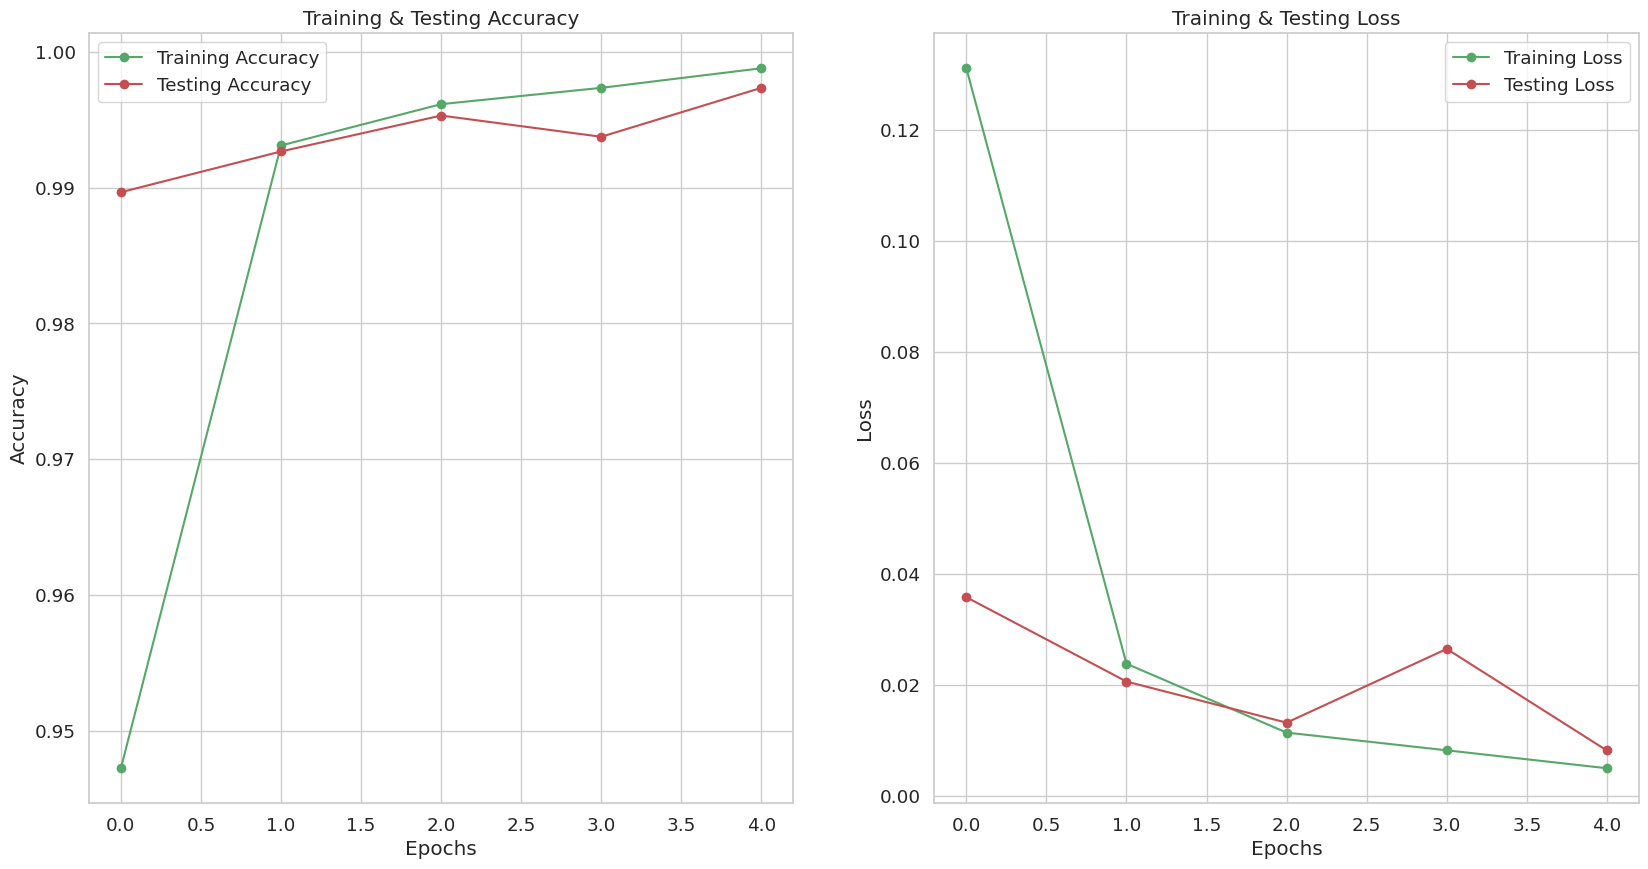

In [ ]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
#pred = model.predict_classes(X_test) -- gives error
pred = (model.predict(X_test) > 0.5).astype("int32")
pred[:5]

261/261 [==============================] - 49s 183ms/step


array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      3015
    Not Fake       1.00      1.00      1.00      5307

    accuracy                           1.00      8322
   macro avg       1.00      1.00      1.00      8322
weighted avg       1.00      1.00      1.00      8322



In [ ]:
cm = confusion_matrix(y_test,pred)
cm

array([[2997,   18],
       [   4, 5303]])

In [ ]:
cm = pd.DataFrame(cm , index = ['Fake','Original'] , columns = ['Fake','Original'])

Text(25.75, 0.5, 'Actual')

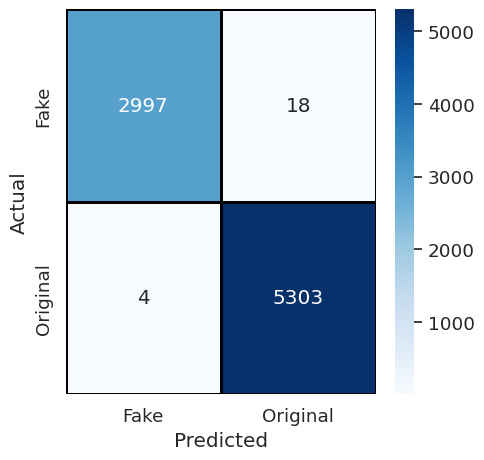

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Original'] , yticklabels = ['Fake','Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# **Data Modelling - Logistic Regression Model**


Reading the data from datasets again since the data in previously declared variables were modified.

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/FakeNews/Fake.csv')
data2 = pd.read_csv('/content/drive/MyDrive/FakeNews/True.csv')

Integrating the data.

In [ ]:
data1['category'] = 0
data2['category'] = 1

data = pd.concat([data1, data2])

Replacing NaN values.

In [ ]:
df1 = data.fillna('')

In [ ]:
df1['content'] = df1['title'] + ' ' + df1['text']

## **Data Transformation using Stemming**

 **Stemming** - It basically is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words. We also remove stopwords from the stemmed words.

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
nltk.download('stopwords')

df1['content'] = df1['content'].apply(stemming)
df1['content'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    donald trump send embarrass new year eve messa...
1    drunk brag trump staffer start russian collus ...
2    sheriff david clark becom internet joke threat...
3    trump obsess even obama name code websit imag ...
4    pope franci call donald trump christma speech ...
Name: content, dtype: object

Splitting the inputs and outputs of the model.

In [ ]:
X = df1.content.values
y = df1.category.values

Transforming the data into vectors.

In [ ]:
X = TfidfVectorizer().fit_transform(X)
print(X)

  (0, 35056)	0.020128691383234174
  (0, 28200)	0.027463323003936932
  (0, 10508)	0.06187015374653722
  (0, 2917)	0.039627266107658064
  (0, 59240)	0.03271637500666989
  (0, 55918)	0.04629387865207693
  (0, 48747)	0.029705009772389185
  (0, 86789)	0.031341434847236116
  (0, 60709)	0.022724484575609563
  (0, 29370)	0.02611807276042532
  (0, 12611)	0.04579308567051352
  (0, 77546)	0.020341410661505722
  (0, 33287)	0.04414417857898777
  (0, 83998)	0.021128027282801734
  (0, 63340)	0.08889530050540474
  (0, 55913)	0.049872553035323355
  (0, 26880)	0.04741524359062462
  (0, 85245)	0.08889530050540474
  (0, 85234)	0.06032882728522855
  (0, 76851)	0.026255603725787745
  (0, 76607)	0.04449778828360175
  (0, 3446)	0.03782347641333661
  (0, 77171)	0.08889530050540474
  (0, 68817)	0.05627823117439934
  (0, 66645)	0.047368202996914174
  :	:
  (44897, 24030)	0.03638088795670512
  (44897, 26081)	0.03497915570115039
  (44897, 52962)	0.04900250741478747
  (44897, 18216)	0.05240799078905557
  (44897, 56

Splitting the inputs and outputs into train and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

## **Applying Logistic Regression model**

Training the model with train data

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Testing the model with train data and test data

In [ ]:
X_train_prediction = model.predict(X_train)

In [ ]:
X_test_prediction = model.predict(X_test)

## **Accuracy and Evaluation Metrics**

In [ ]:
#training accuracy
training_accuracy = accuracy_score(X_train_prediction, y_train)
print(training_accuracy)

0.9920931009521688


In [ ]:
#test accuracy
testing_accuracy = accuracy_score(X_test_prediction, y_test)
print(testing_accuracy)

0.9861915367483296


In [ ]:
print(classification_report(y_test, X_test_prediction, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
    Not Fake       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
cm = confusion_matrix(y_test, X_test_prediction)
cm

array([[4635,   61],
       [  63, 4221]])

In [ ]:
#sample testing
X_sample = X_test[0]
prediction = model.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Fake!


# **Conclusion**

* Our model helps in classifying a given piece of news as fake or true, based on the embedded word knowledge and the huge number of both kinds of data that it has been trained with.
* We have limited our epochs number to 5 in LSTM to prevent overfitting and loss of data during training. And we have chosen our batch size as 256.
* Using the LSTM Machine Learning approach we have achieved an accuracy percentage of 99.73%
* The confusion matrix gives us a summary of how well the fake and true news have been recognized and mapped to their labels. There are very few- 4 and 18 records that have been misclassified by the model. Also we can observe that the number of fake news that has been classified as true (18) is higher than the number of true news that have been disregarded as fake. Looking on the brighter side of our model, it has managed to classify 2997 and 5303 news records as fake and true news correctly.

<br>

* Using the Logistic Regression Machine Learning approach we have achieved an accuracy percentage of 98.61%
* The confusion matrix gives us a summary of how well the fake and true news have been recognized and mapped to their labels. There are very few- 63 and 61 records that have been misclassified by the model. Looking on the brighter side of our model, it has managed to classify 4635 and 4221 news records as fake and true news correctly.


